In [3]:
import pandas as pd
full_merged=pd.read_csv('/Users/ahmadkhalilghamai/Desktop/IH-DA-Project02/my project csv files/full_merged.csv')
full_merged.head()


/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_23509/1163383113.py:2: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  full_merged=pd.read_csv('/Users/ahmadkhalilghamai/Desktop/IH-DA-Project02/my project csv files/full_merged.csv')


,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,is_client,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,0,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,True,6.0,73.0,60.5,NaN,2.0,45105.30,6.0,9.0,Test
1,1,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,True,7.0,94.0,58.0,NaN,2.0,110860.30,6.0,9.0,Test
2,2,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,True,5.0,64.0,32.0,NaN,2.0,52467.79,6.0,9.0,Test
3,3,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,True,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,4,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15,True,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Test


In [5]:
# Make sure date_time is parsed properly (only needed if using time features later)
full_merged['date_time'] = pd.to_datetime(full_merged['date_time'], errors='coerce')

In [7]:
# Determine final step name in funnel
final_step = full_merged['process_step'].dropna().unique().tolist()[-1]

In [9]:
# Group by variation and visit_id to find who completed the final step
completed = (
    full_merged.groupby(['variation', 'visit_id'])['process_step']
    .apply(lambda steps: final_step in steps.values)
    .reset_index(name='completed')
)
print(completed)

      variation                      visit_id  completed
0       Control  100030127_47967100085_936361      False
1       Control  100037962_47432393712_705583      False
2       Control  100057941_88477660212_944512      False
3       Control   10006594_66157970412_679648       True
4       Control  100071743_53464757454_616703      False
...         ...                           ...        ...
69320      Test  999960019_60838685252_926860      False
69321      Test  999971096_28827267783_236076       True
69322      Test  999976049_95772503197_182554       True
69323      Test  999984454_18731538378_781808       True
69324      Test  999988789_76411676596_272843      False

[69325 rows x 3 columns]


In [11]:
# Compute total visits and completion rate per variation
kpis_by_variation = (
    completed.groupby('variation')['completed']
    .agg(Total_Visits='count', Completion_Rate='mean')
    .reset_index()
)
print(kpis_by_variation)

  variation  Total_Visits  Completion_Rate
0   Control         32189         0.498493
1      Test         37136         0.585173


In [13]:
kpis_by_variation['Error_Rate'] = 1 - kpis_by_variation['Completion_Rate']

# Display results
print(kpis_by_variation)

  variation  Total_Visits  Completion_Rate  Error_Rate
0   Control         32189         0.498493    0.501507
1      Test         37136         0.585173    0.414827


/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_23509/3472189074.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="variation", y="Total_Visits", data=kpis_by_variation, ax=axes[0], palette="Blues_d")
/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_23509/3472189074.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="variation", y="Completion_Rate", data=kpis_by_variation, ax=axes[1], palette="Greens_d")
/var/folders/l4/g8j3y_vx0pq5tl_95dwxp9hr0000gp/T/ipykernel_23509/3472189074.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

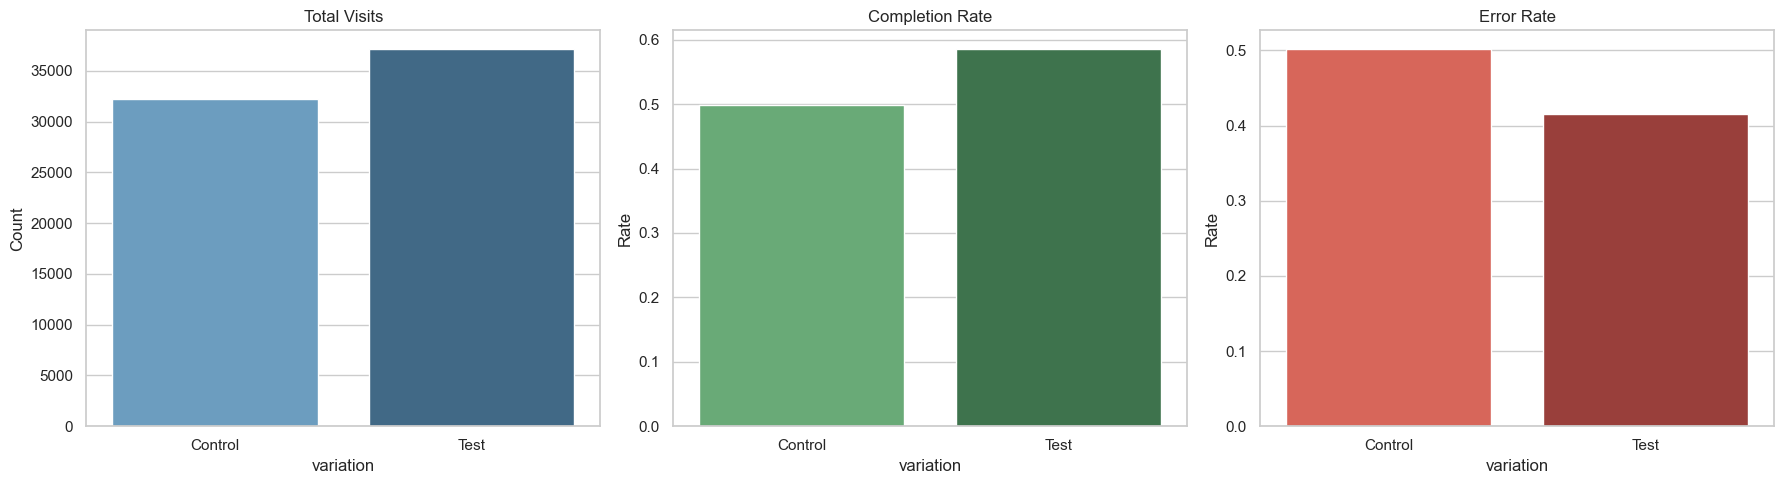

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Total Visits
sns.barplot(x="variation", y="Total_Visits", data=kpis_by_variation, ax=axes[0], palette="Blues_d")
axes[0].set_title("Total Visits")
axes[0].set_ylabel("Count")

# Plot Completion Rate
sns.barplot(x="variation", y="Completion_Rate", data=kpis_by_variation, ax=axes[1], palette="Greens_d")
axes[1].set_title("Completion Rate")
axes[1].set_ylabel("Rate")

# Plot Error Rate
sns.barplot(x="variation", y="Error_Rate", data=kpis_by_variation, ax=axes[2], palette="Reds_d")
axes[2].set_title("Error Rate")
axes[2].set_ylabel("Rate")

# Show the plots
plt.tight_layout()
plt.show()


